<img src="./logo_UNSAM.jpg" align= "right" width= "150" /> -->
## APS
## Trabajo práctico semanal 1
### Violeta Manterola

La primer tarea consistirá en programar una función que genere señales senoidales y que permita parametrizar:
 - la amplitud máxima de la senoidal (volts)
 - su valor medio (volts)
 - la frecuencia (Hz)
 - la fase (radianes)
 - la cantidad de muestras digitalizada por el ADC (# muestras)
 - la frecuencia de muestreo del ADC.


Probar con las siguientes frecuencias:
 - ff = 500 Hz
 - ff = 999 Hz
 - ff = 1001 Hz
 - ff = 2001 Hz


Implementar con alguna otra señal propia de un generador de señales. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def my_funcion_sen( vmax =1, dc=0, ff=1, ph=0, nn=1000, fs=1000 ):
    #donde ff es la frecuencia de la señal, ph: la fase, fs: frecuencia de muestreo, dc:valor medio. 
  
    ts = 1/fs # tiempo de muestreo
    #df = fs/N # resolución espectral
    t_simulacion = nn * ts # segundo

    # grilla de sampleo temporal
    tt = np.arange(start = 0, stop = t_simulacion, step = ts)
    xx = dc + vmax * np.sin( 2 * np.pi * ff * tt + ph )#aplico la funcion numpysin
    
    return tt,xx

# Presentación gráfica de la señal (es la msima para todas las frecuencias)    
def configuracion_plot(xx,tt,frec):
    plt.figure(1)
    plt.plot(tt, xx, label=f'{frec} Hz')
    plt.xlabel('Tiempo [seg]')
    plt.ylabel('Amplitud [V]')
    plt.legend(loc='upper right')
    

#luego debo analizar lo mismo con otro tipo de señal de onda propia de un generador de señales. 
#en este caso ejemplo una onda cuadrada o step. 
def my_funcion_cuad(vmax =1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    ts = 1/fs # tiempo de muestreo
    t_simulacion = nn * ts # segundo

    # grilla de sampleo temporal
    tt = np.arange(start = 0, stop = t_simulacion, step = ts)
    xx = dc + vmax * signal.square(2 * np.pi * ff * tt + ph)
    
    return tt,xx


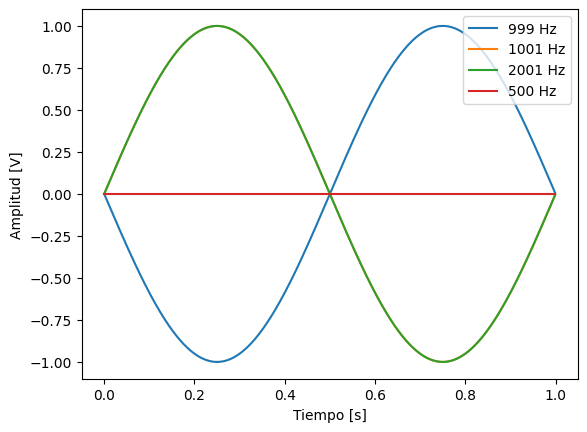

In [4]:
#sampleo con las frecuencias, en un mismo gráfico para poder comprar. 
#llamo a la funcion y modifico la variable de frecuencia. 
N = 1000 #datos generales, iguales para todas las muestras. 
fs = 1000  # frecuencia de muestreo en Hz

frec1 = 999
tt1, xx1 = my_funcion_sen(vmax=1, dc=0, ff=frec1, ph=0, nn=N, fs=fs)
frec2 = 1001
tt2, xx2 = my_funcion_sen(vmax=1, dc=0, ff=frec2, ph=0, nn=N, fs=fs)
frec3 = 2001
tt3, xx3 = my_funcion_sen(vmax=1, dc=0, ff=frec3, ph=0, nn=N, fs=fs)
frec4 = 500
tt4, xx4 = my_funcion_sen(vmax=1, dc=0, ff=frec4, ph=0, nn=N, fs=fs)

configuracion_plot(xx1,tt1,frec1)
configuracion_plot(xx2,tt2,frec2)
configuracion_plot(xx3,tt3,frec3)
configuracion_plot(xx4,tt4,frec4)
plt.show()

En el presente gráfico se observa que las señales de 999Hz y 1001Hz se presentan de manera muy similar lo cual impide que puedan distinguirse una de otra. Esto implica que cuando la frecuencia de *Nyquist*, aquella interpretada como la mitad de la frecuencia de sampleo (500Hz), es superada se produce un fenómeno conocido como **aliasing**, el cual afecta la interpretacion de las señales ya que cuando supera los 500Hz se produce un "solapamiento" de las frecuencias, lo que hace que altas freuencias se confundan con bajas. 
Además la frecuencia de Nyquist se visualiza como una línea recta en este gráfico dando la ilusion de que es una constante en el tiempo, lo que indica que en este límite se pierde información. A continuación un gráfico donde se samplea solo esta frecuencia; se puede ver como utiliza una escala lgaritmica para hacer visibles los detalles. 

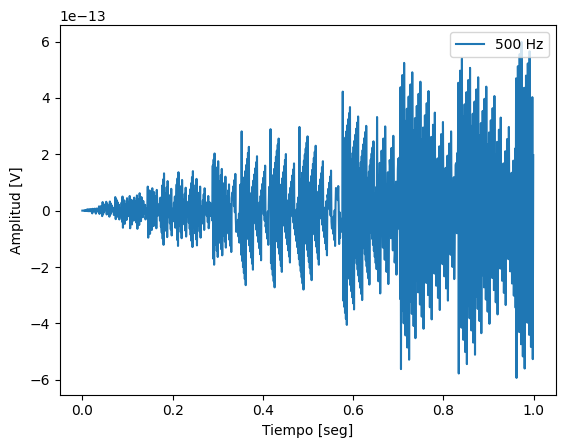

In [6]:
N = 1000 
fs = 1000  #[Hz]
frec = 500 #[Hz]
tt, xx = my_funcion_sen(vmax=1, dc=0, ff=frec, ph=0, nn=N, fs=fs)

configuracion_plot(xx,tt,frec)
plt.show()

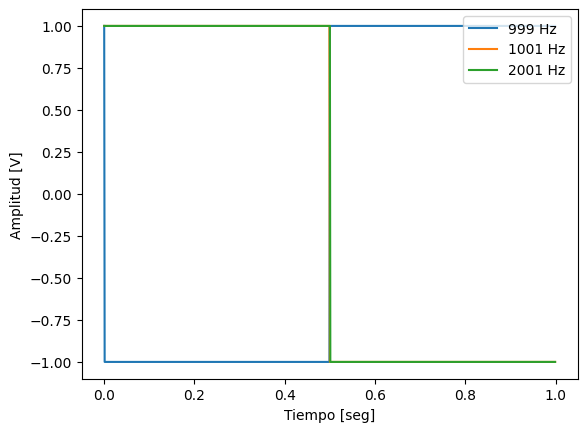

In [3]:
#lo mimso con otra señal, propia de un generador de señales. 
N = 1000
fs = 1000 
frec1 = 999
tt1, xx1 = my_funcion_cuad(vmax=1, dc=0, ff=frec1, ph=0, nn=N, fs=fs)
frec2 = 1001
tt2,xx2 = my_funcion_cuad(vmax=1, dc=0, ff=frec2, ph=0, nn=N, fs=fs)
frec3 = 2001
tt3,xx3 = my_funcion_cuad(vmax=1, dc=0, ff=frec3, ph=0, nn=N, fs=fs)
configuracion_plot(xx1,tt1,frec1)
configuracion_plot(xx2,tt2,frec2)
configuracion_plot(xx3,tt3,frec3)
plt.show()

En este caso sucede lo mismo que en aquel analizado previamente, se produce el fenómeno de aliasing en donde, una vez superada la frecuencia de Nyquist, las altas frecuencias se solapan y no puede distinguirse entre ellas. 